### <span style='color:blue '> Homework1 <span>

                                            
**Name**:  Payal Rashinkar <br>                                                                                          **USC_ID**:   3885-1419-03 <br>                                                                                        **Github User**:   PayalRashinkar <br>

### <span style='color:blue '> (a) Download Data <span>

**Package** 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.datasets import make_classification

!python -m pip install -U prettytable
from prettytable import PrettyTable

Get the Vertebral Column Data Set
https://archive.ics.uci.edu/ml/datasets/Vertebral+Column

In [11]:
Columns = ["Incidence","tilt","lumbar_lordosis","sacral_slope","radius","spondylolisthesis","classify"]
Directory = './data/column_2C.dat'
df = pd.read_csv(Directory,delimiter=" ",header=None,names=Columns)
df

,Incidence,tilt,lumbar_lordosis,sacral_slope,radius,spondylolisthesis,classify
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


### <span style='color:blue '> (b) Pre-Processing and Exploratory Data Analysis <span>

#### i. Scatterplots

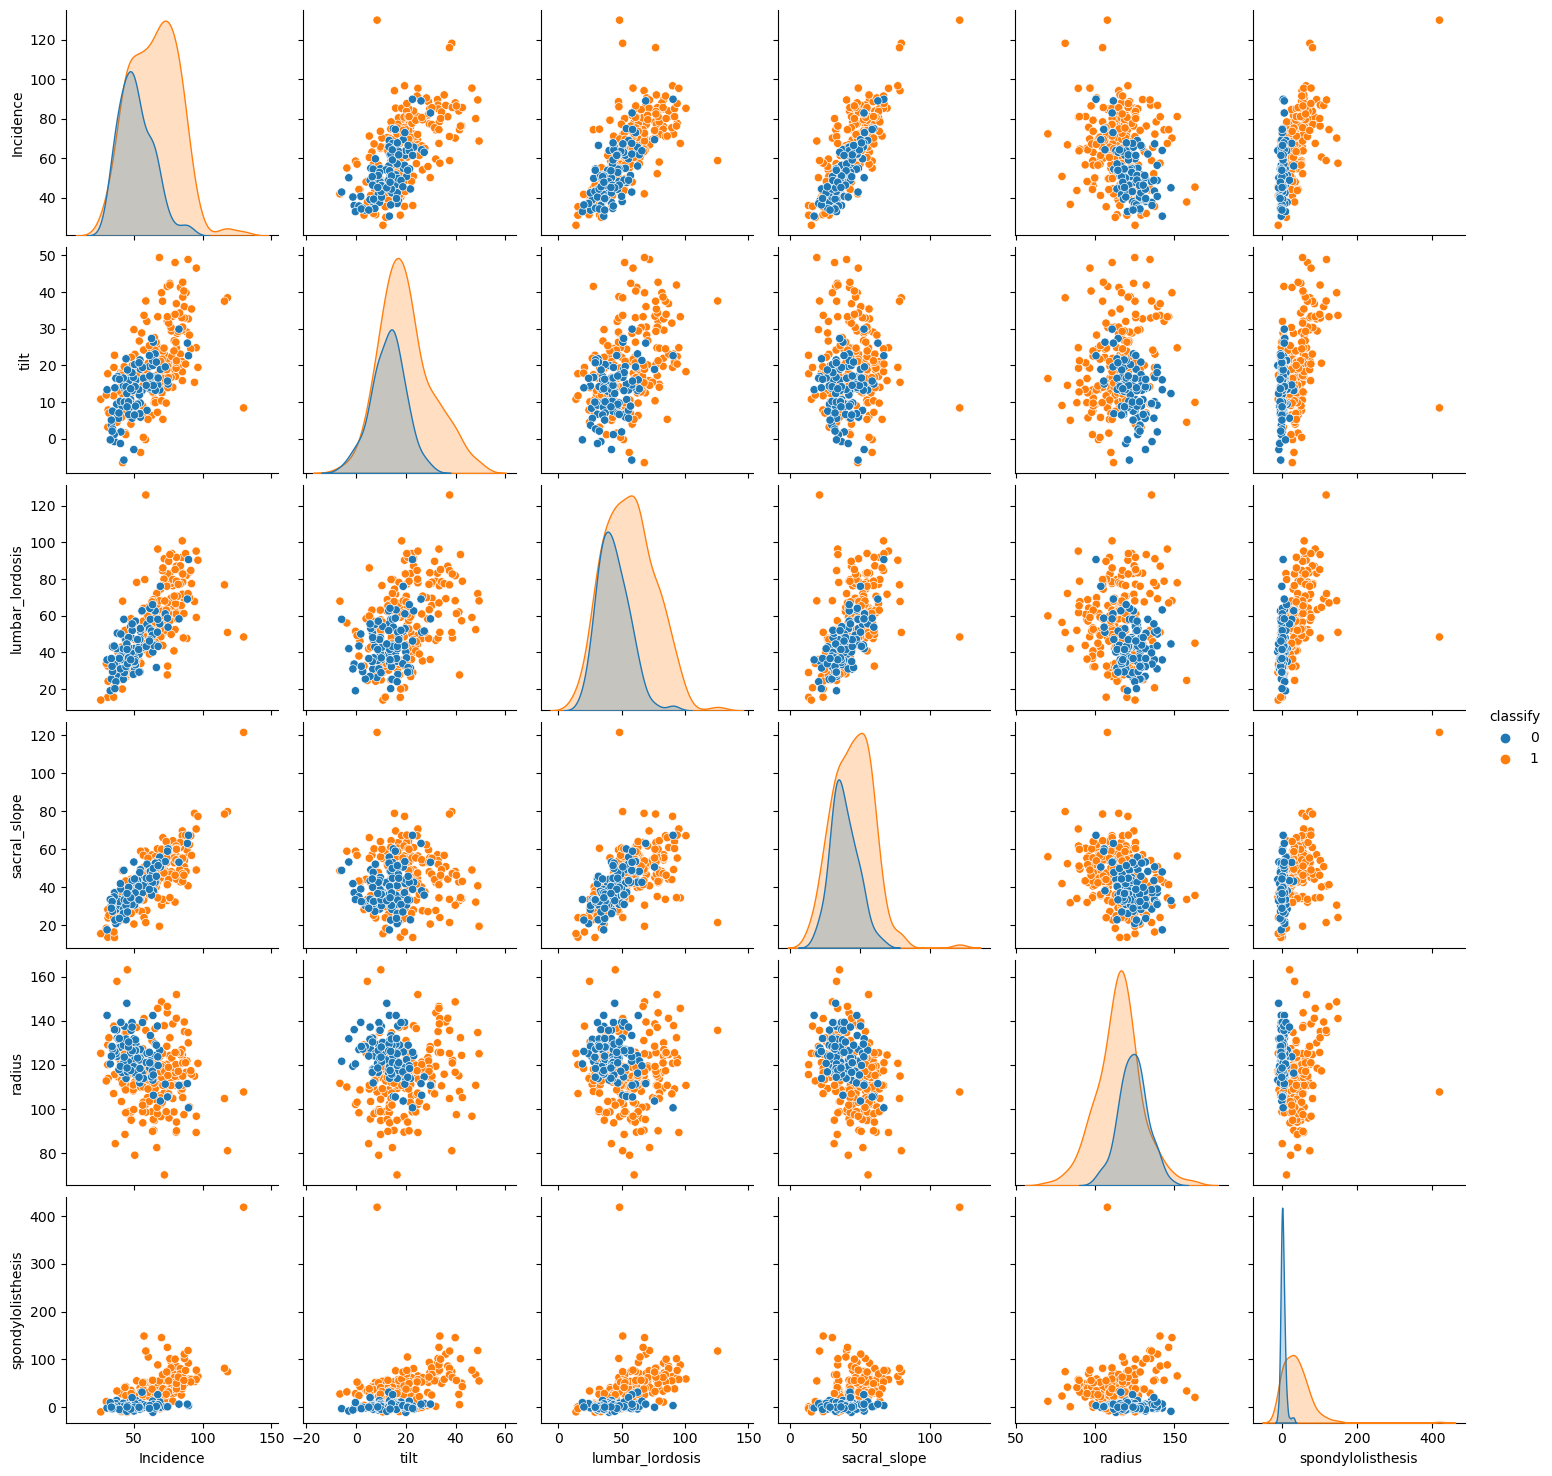

In [12]:
df.classify.replace(['NO', 'AB'], [0, 1], inplace=True)
pair_plot = sns.pairplot(data = df, hue = "classify")

#### ii. Boxplots

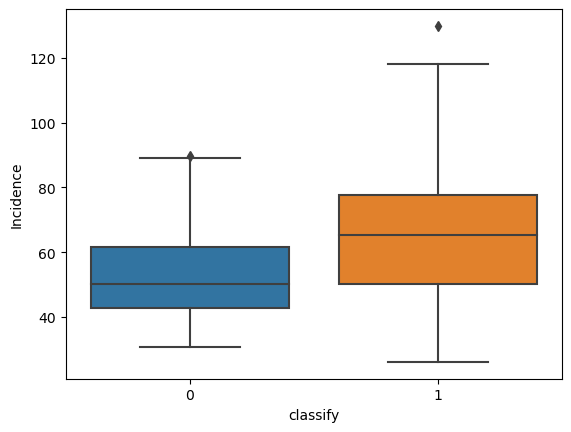

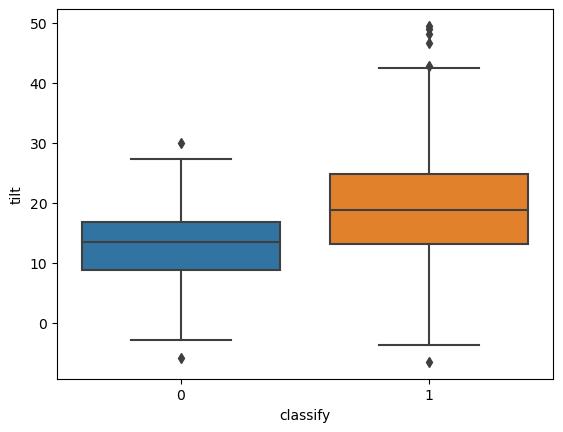

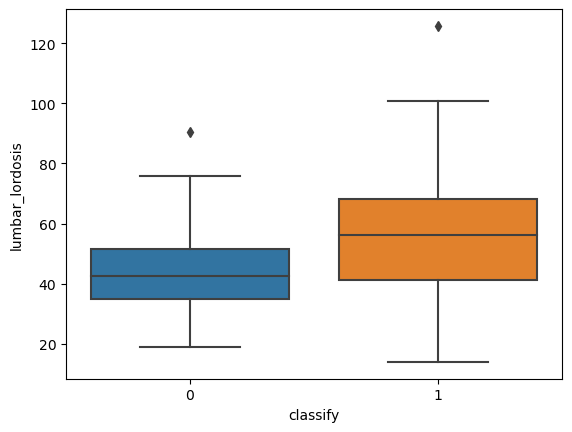

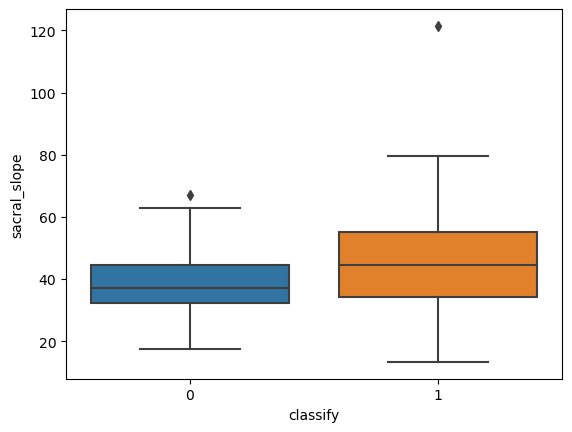

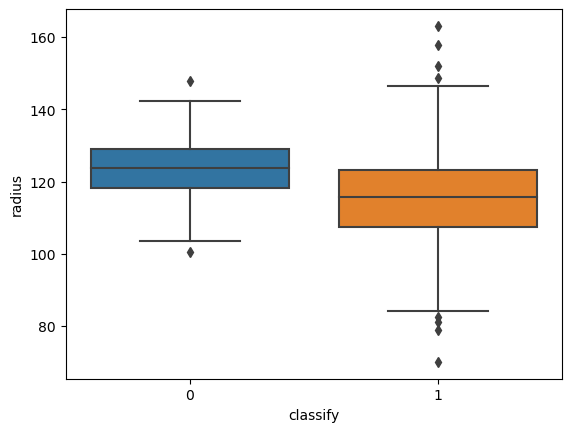

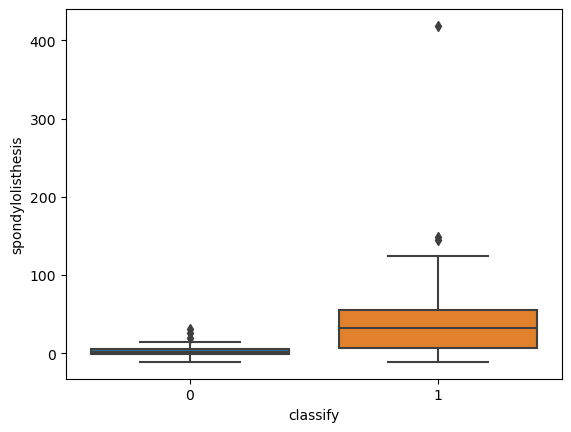

In [13]:
for i in range(0, len(df.columns) - 1):
    sns.boxplot(data=df, x="classify", y=df.columns[i])
    plt.show()

#### iii. Split Data Set

In [14]:
training_set = pd.concat([df[df["classify"] == 0].iloc[0:70, :], df[df["classify"] == 1].iloc[0:140, :]])
testing_set = pd.concat([df[df["classify"] == 0].iloc[70:, :], df[df["classify"] == 1].iloc[140:, :]])

print("rows and columns of training dataset:" + str(training_set.shape))
print("rows and columns of testing dataset:" + str(testing_set.shape)) 

rows and columns of training dataset:(210, 7)
rows and columns of testing dataset:(100, 7)


### <span style='color:blue '> (c) Classification <span>

#### i. Euclidean Metric

In [15]:
training_features = training_set.iloc[:, 0:(len(df.columns) - 1)].values
training_labels = training_set.iloc[:, (len(df.columns) - 1)].values
classifier = KNeighborsClassifier(n_neighbors = 5, p=2, metric='euclidean')
classifier.fit(training_features, training_labels)

KNeighborsClassifier(metric='euclidean')

#### ii. Test Data

In [16]:
testing_features = testing_set.iloc[:, 0:(len(df.columns) - 1)].values
testing_labels = testing_set.iloc[:, (len(df.columns) - 1)].values
training_error_list = []
testing_error_list = []
best_k_value = 0
min_error = float("inf")

k_values = range(208, 0, -3)
for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(training_features, training_labels)
    
    training_error = 1 - accuracy_score(training_labels, classifier.predict(training_features))
    training_error_list.append(training_error)
    
    testing_error = 1 - accuracy_score(testing_labels, classifier.predict(testing_features))
    testing_error_list.append(testing_error)
    
    if testing_error < min_error:
        min_error = testing_error
        best_k_value = k
    
print(f"For k_value = {best_k_value}, the least testing error is = {round(min_error, 3)}")

For k_value = 4, the least testing error is = 0.06


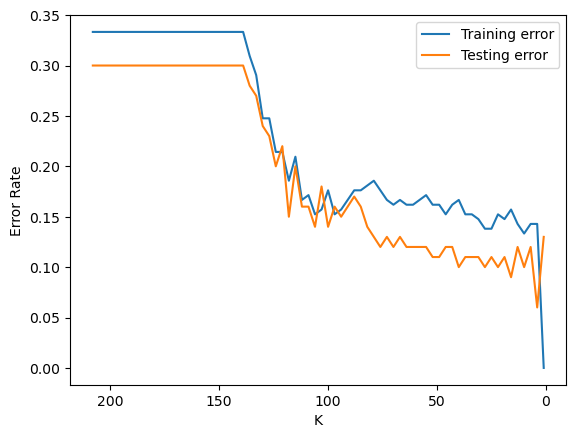

In [17]:
x = range(208, 0, -3)
plt.plot(x, training_error_list, label="Training error")
plt.plot(x, testing_error_list, label="Testing error")
plt.gca().invert_xaxis()
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.legend()
plt.show()

In [18]:
def pretty_table(heading, rows):
    table = PrettyTable()
    table.field_names = heading
    for row in rows:
        table.add_row(row)
    return table

classifier_best_k = KNeighborsClassifier(n_neighbors = best_k_value, metric='euclidean')
classifier_best_k.fit(training_features, training_labels)
predicted_testing_labels = classifier_best_k.predict(testing_features)
confusion = confusion_matrix(testing_labels, predicted_testing_labels)
t_neg, f_neg, t_pos, f_pos = confusion[0][0], confusion[1][0], confusion[1][1], confusion[0][1]

tp_rate =  t_pos / (t_pos + f_neg)
tn_rate = t_neg / (f_pos + t_neg)
precision = t_pos / (t_pos + f_neg)
recall = t_pos / (t_pos + f_neg)
f1score = 2 * (precision * recall) / (precision + recall)

print("Confusion Matrix:")
headers = ["Total Population", "Positive", "Negative"]
rows = [["Positive", t_pos, f_neg], ["Negative", f_pos, t_neg]]
print(pretty_table(headers, rows))

print("Metrics Calculation:")
if True: 
    headers = ["Metrics", "Values"]
    rows = [["True Negative ", t_neg],
                  ["False Negative ", f_neg],
                  ["True Positive ", t_pos],
                  ["False Positive ", f_pos],
                  ["True Positive Rate ", round(tp_rate, 2)],
                  ["True Negative Rate ", round(tn_rate, 2)],
                  ["Precision", round(precision, 2)],
                  ["Recall", round(recall, 2)],
                  ["F1-score", round(f1score, 2)]]
    print(pretty_table(headers, rows))


Confusion Matrix:
+------------------+----------+----------+
| Total Population | Positive | Negative |
+------------------+----------+----------+
|     Positive     |    69    |    1     |
|     Negative     |    5     |    25    |
+------------------+----------+----------+
Metrics Calculation:
+---------------------+--------+
|       Metrics       | Values |
+---------------------+--------+
|    True Negative    |   25   |
|   False Negative    |   1    |
|    True Positive    |   69   |
|   False Positive    |   5    |
| True Positive Rate  |  0.99  |
| True Negative Rate  |  0.83  |
|      Precision      |  0.99  |
|        Recall       |  0.99  |
|       F1-score      |  0.99  |
+---------------------+--------+


#### iii. Learning Curve

In [19]:
best_k_list = []
best_error_list = []

for n in range(10, 211, 10):
    truncated_train_set = pd.concat([training_set[training_set["classify"] == 0].iloc[0: n // 3, :], 
                                    training_set[training_set["classify"] == 1].iloc[0: n - n // 3, :]])

    truncated_training_features = truncated_train_set.iloc[:, 0:(len(df.columns) - 1)].values
    truncated_training_labels = truncated_train_set.iloc[:, (len(df.columns) - 1)].values
    
    best_k = 0
    best_error = float("inf")
    for k in range(1, n, 5):
        classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        classifier.fit(truncated_training_features, truncated_training_labels)
        predicted_test_labels_for_truncated_training_set = classifier.predict(testing_features)
        truncated_training_error = 1 - accuracy_score(testing_labels, predicted_test_labels_for_truncated_training_set)
        if truncated_training_error < best_error:
            best_error = round(truncated_training_error, 2)
            best_k = k
    
    best_k_list.append(best_k)
    best_error_list.append(best_error)

headers = ["Metric", "Value"]
rows = [
    ["Optimal K", min(best_k_list)],
    ["Error rate for optimal k", min(best_error_list)]
]
print(pretty_table(headers, rows))


+--------------------------+-------+
|          Metric          | Value |
+--------------------------+-------+
|        Optimal K         |   1   |
| Error rate for optimal k |  0.08 |
+--------------------------+-------+


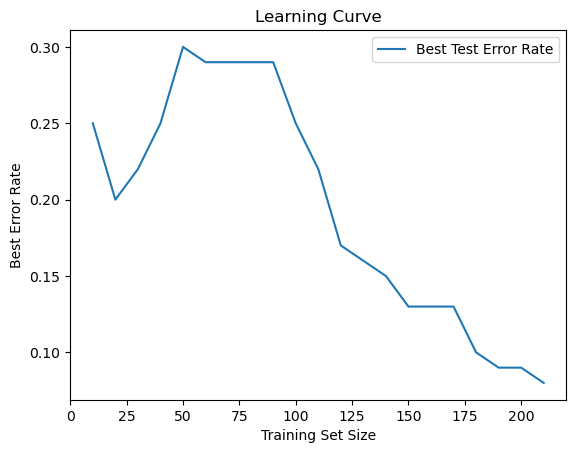

In [20]:
plt.plot(range(10, 211, 10), best_error_list, label="Best Test Error Rate")
plt.gca().set_title("Learning Curve")
plt.gca().set_xlabel("Training Set Size")
plt.gca().set_ylabel("Best Error Rate")
plt.gca().legend()
plt.show()

### <span style='color:blue '> (d) Other Metrics <span>

#### i. Minkowski Distance.

In [21]:
def sort_dict(dict):
    sorted_dict = {}
    sorted_keys = sorted(dict, key=dict.get)
    for w in sorted_keys:
        sorted_dict[w] = dict[w]
    return sorted_dict

def k_values_for_min_test_errors(test):
    sorted_dict = sort_dict(test)
    anchor = sorted_dict[list(sorted_dict)[0]]
    ans = {}
    for key, value in sorted_dict.items():
        if sorted_dict[key] != anchor:
            break
        ans[key] = value
    return ans

def knn_variations(training_set, testing_set, p_value, k_series, metric_used, weights='uniform'):
    
    training_features = training_set.iloc[:, 0:(len(df.columns) - 1)].values
    training_labels = training_set.iloc[:, (len(df.columns) - 1)].values

    testing_features = testing_set.iloc[:, 0:(len(df.columns) - 1)].values
    testing_labels = testing_set.iloc[:, (len(df.columns) - 1)].values
    
    options = None
    if metric_used == "mahalanobis":
        options = {"VI": np.linalg.pinv(np.cov(training_features, rowvar=False))}
    else:
        options = None
    
    k_vs_error_dict = dict()
    
    for k in k_series:
        classifier = KNeighborsClassifier(n_neighbors=k, p=p_value, metric=metric_used, weights=weights, metric_params=options)
        classifier.fit(training_features, training_labels)
        testing_error = 1 - accuracy_score(testing_labels, classifier.predict(testing_features))
        k_vs_error_dict[k] = round(testing_error, 2)
        
    return k_vs_error_dict

##### A. Manhattan Distance with p = 1.

In [22]:
collect = knn_variations(training_set, testing_set, 1, range(1, 200, 5), "manhattan", 'uniform')
manhattan = k_values_for_min_test_errors(collect)

headers = ["Optimal K ", "Minimum Test Errors"]
rows = []
for key, value in manhattan.items():
    rows.append([key, value])
print(pretty_table(headers, rows))

+------------+---------------------+
| Optimal K  | Minimum Test Errors |
+------------+---------------------+
|     6      |         0.11        |
|     11     |         0.11        |
|     26     |         0.11        |
+------------+---------------------+


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [23]:
def p_data(training_set, testing_set, p_series, weighted = False):
    training_features = training_set.iloc[:, 0:(len(df.columns) - 1)].values
    training_labels = training_set.iloc[:, (len(df.columns) - 1)].values

    testing_features = testing_set.iloc[:, 0:(len(df.columns) - 1)].values
    testing_labels = testing_set.iloc[:, (len(df.columns) - 1)].values
    
    test_error_list = []
    
    for p_value in p_series:
        classifier = KNeighborsClassifier(n_neighbors=6, p=p_value, metric="minkowski")
        classifier.fit(training_features, training_labels)
        testing_error = 1 - accuracy_score(testing_labels, classifier.predict(testing_features))
        test_error_list.append(testing_error)
        
    return {
        "P": p_series,
        "log10(p)": np.linspace(0.1, 1, 10),
        "test_error": test_error_list
    }

In [24]:
collect_p_data = p_data(training_set, testing_set, np.logspace(0.1, 1, 10))
p_dataframe = pd.DataFrame(collect_p_data)
p_dataframe

,P,log10(p),test_error
0,1.258925,0.1,0.09
1,1.584893,0.2,0.09
2,1.995262,0.3,0.08
3,2.511886,0.4,0.08
4,3.162278,0.5,0.08
5,3.981072,0.6,0.06
6,5.011872,0.7,0.07
7,6.309573,0.8,0.08
8,7.943282,0.9,0.09
9,10.000000,1.0,0.09


In [25]:
min_test_error = p_dataframe["test_error"].min()
p_dataframe[p_dataframe["test_error"] == min_test_error]

,P,log10(p),test_error
5,3.981072,0.6,0.06


##### C. Chebyshev Distance With p -> infinity.

In [26]:
cheb_data = knn_variations(training_set, testing_set, 1, range(1, 200, 5), "chebyshev", 'uniform')
chebyshev = k_values_for_min_test_errors(cheb_data)
headers = ["Optimal K Values", "Minimum Test Errors"]
rows = []
for key, value in chebyshev.items():
    rows.append([key, value])
print(pretty_table(headers, rows))

+------------------+---------------------+
| Optimal K Values | Minimum Test Errors |
+------------------+---------------------+
|        16        |         0.08        |
+------------------+---------------------+


#### ii. Mahalanobis Distance.

In [27]:
k_values = range(1, 200, 5)
p_value = 2
mahal_data = knn_variations(training_set, testing_set, p_value, k_values, "mahalanobis", "uniform")
mahalanobis = k_values_for_min_test_errors(mahal_data)
headers = ["Optimal K Values", "Minimum Test Errors"]
rows = []
for key, value in mahalanobis.items():
    rows.append([key, value])
print(pretty_table(headers, rows))

+------------------+---------------------+
| Optimal K Values | Minimum Test Errors |
+------------------+---------------------+
|        1         |         0.17        |
|        6         |         0.17        |
+------------------+---------------------+


### <span style='color:blue '>  (e) Weighted Decision <span>

In [ ]:
def table(metric, ans):
    print(f"\n{metric}")
    headers = ["Optimal K ", "Minimum Test Errors"]
    rows = []
    for key, value in ans.items():
        rows.append([key, value])
    print(pretty_table(headers, rows))

def weighted_knn_analysis():
    distance_type = ["euclidean", "manhattan", "chebyshev"]
    for metric in distance_type:
        k_values = range(1, 200, 5)
        p_value = 1
        collect_metric = knn_variations(training_set, testing_set, p_value, k_values, metric, 'distance')
        all_ans = k_values_for_min_test_errors(collect_metric)
        table(metric, all_ans)
        
weighted_knn_analysis()


euclidean
+------------+---------------------+
| Optimal K  | Minimum Test Errors |
+------------+---------------------+
|     6      |         0.1         |
+------------+---------------------+

manhattan
+------------+---------------------+
| Optimal K  | Minimum Test Errors |
+------------+---------------------+
|     26     |         0.1         |
+------------+---------------------+

chebyshev
+------------+---------------------+
| Optimal K  | Minimum Test Errors |
+------------+---------------------+
|     16     |         0.11        |
|     31     |         0.11        |
|     36     |         0.11        |
|     41     |         0.11        |
|     61     |         0.11        |
+------------+---------------------+


### <span style='color:blue '> (f) What is the lowest training error rate you achieved in this homework? <span>

0 is the least training error rate achieved in this homework.